In [1]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt

In [2]:
path = '/Users/wuriga/Desktop/DPS_challenge/'

In [3]:
os.listdir(path)

['Predict_accident.ipynb',
 'monatszahlen2112_verkehrsunfaelle.csv',
 '.ipynb_checkpoints',
 'Predict_accident-Copy1.ipynb']

# Q1: to visualise historically the number of accidents per category (column1)

In [4]:
df = pd.read_csv('monatszahlen2112_verkehrsunfaelle.csv')
df.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0
1994,Verkehrsunfälle,Verletzte und Getötete,2000,200012,515.0,NaN,-10.90,NaN,588.0


Tranlation of column names: 'AUSPRAEGUNG':'SPECIFICATION','WERT':'VALUE'

In [5]:
#list of columns names 
list(df.columns)

['MONATSZAHL',
 'AUSPRAEGUNG',
 'JAHR',
 'MONAT',
 'WERT',
 'VORJAHRESWERT',
 'VERAEND_VORMONAT_PROZENT',
 'VERAEND_VORJAHRESMONAT_PROZENT',
 'ZWOELF_MONATE_MITTELWERT']

In [6]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1995 non-null   object 
 1   AUSPRAEGUNG                     1995 non-null   object 
 2   JAHR                            1995 non-null   int64  
 3   MONAT                           1995 non-null   object 
 4   WERT                            1911 non-null   float64
 5   VORJAHRESWERT                   1904 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1756 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1819 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1764 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 140.4+ KB


In [7]:
# Assess whether or not the dataframe contains duplicated rows.
df.duplicated().sum()

0

In [8]:
df.shape

(1995, 9)

Apparently,the dataframe contain null values,since some columns have less than 1995 rows. 

In [9]:
# Apparently, there are not null values.
df.isnull().sum().any()

True

It means the dataframe contains null values.We can replace the NAN values with zero.

In [10]:
df.fillna(value= 0 , inplace= True)

In [11]:
df['MONATSZAHL'].value_counts()

Verkehrsunfälle    855
Fluchtunfälle      570
Alkoholunfälle     570
Name: MONATSZAHL, dtype: int64

In [12]:
df['AUSPRAEGUNG'].value_counts()

insgesamt                 855
Verletzte und Getötete    855
mit Personenschäden       285
Name: AUSPRAEGUNG, dtype: int64

As we can see,the accident contains 3 categories: Verkehrsunfälle (traffic accidents) happens 855 times,Alkoholunfälle (alcoholic accident) happens 570 and the last type Fluchtunfälle (escape accidents) also happens 570.In each type of accident, it also can be divided into three types: insgesamt(total number),Verletzte und Getötete(injured and died),mit Personenschäden(with personjuiry).

Since we anlysis the variations of each type of accidents hitorically, we only need the data related the time ,accident types.So we can delete the all unrelated columns.

In [13]:
# drop the unneccessary columns
#df.columns[-4:]
df.drop(df.columns[-4:],axis = 1, inplace = True)

In [14]:
# columns after dropping 
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT'], dtype='object')

In [15]:
df[df['JAHR'] == 2020].head(30)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
17,Alkoholunfälle,insgesamt,2020,202005,40.0
18,Alkoholunfälle,insgesamt,2020,202006,49.0
19,Alkoholunfälle,insgesamt,2020,202007,58.0
20,Alkoholunfälle,insgesamt,2020,202008,46.0
21,Alkoholunfälle,insgesamt,2020,202009,46.0


As shown above, the dataframe starts from 2021 to 2000.Essentially, it contains a row at the end of each year to sum up the accident in the whole year.These summary rows are named as 'Summe' in the 'MONAT' column.If we'd like to do the monthly analysis, we need to exclude the summe in each year.

# Total accidents in years

In [16]:
df_total = df[df['MONAT']=='Summe']
df_total.head(30)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
25,Alkoholunfälle,insgesamt,2019,Summe,434.0
38,Alkoholunfälle,insgesamt,2018,Summe,398.0
51,Alkoholunfälle,insgesamt,2017,Summe,409.0
64,Alkoholunfälle,insgesamt,2016,Summe,301.0
77,Alkoholunfälle,insgesamt,2015,Summe,411.0
90,Alkoholunfälle,insgesamt,2014,Summe,382.0
103,Alkoholunfälle,insgesamt,2013,Summe,377.0
116,Alkoholunfälle,insgesamt,2012,Summe,440.0
129,Alkoholunfälle,insgesamt,2011,Summe,397.0


In [17]:
df_total_category = df_total[df_total['AUSPRAEGUNG']== 'insgesamt'].sort_values('JAHR')

In [18]:
df_total_category.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
1412,Verkehrsunfälle,insgesamt,2000,Summe,44494.0
272,Alkoholunfälle,insgesamt,2000,Summe,934.0
842,Fluchtunfälle,insgesamt,2000,Summe,11467.0
829,Fluchtunfälle,insgesamt,2001,Summe,11396.0
259,Alkoholunfälle,insgesamt,2001,Summe,848.0


In [19]:
accidient_category = df_total_category.pivot(index = 'JAHR',columns = 'MONATSZAHL',
                                            values = 'WERT')
#accidient_category.add_suffix(' (Economic Damage)')
accidient_category.head()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
JAHR,,,
2000,934.0,11467.0,44494.0
2001,848.0,11396.0,45713.0
2002,803.0,10651.0,40608.0
2003,730.0,9611.0,38635.0
2004,659.0,10547.0,40064.0


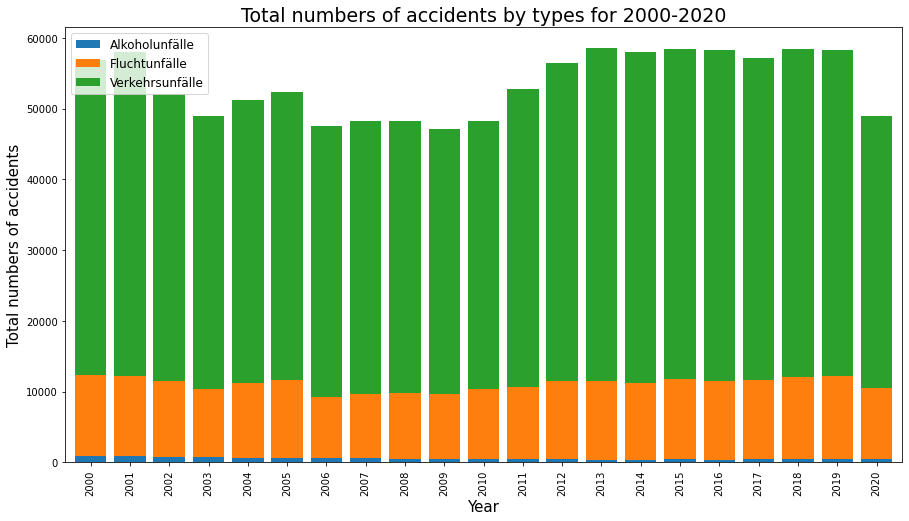

In [20]:
# Plot the economic damage categorised by the type of natural disasters for 1950-2018
accidient_category.loc[2000:].plot.bar(width = 0.8, stacked = True, figsize = (15, 8))

plt.title('Total numbers of accidents by types for 2000-2020', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total numbers of accidents', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})
plt.show()

This gives us the overall trend of each type accident from 2000 to 2020.From the anually analysis,we could know that the alchoho accidents only occupy less portion in these three types accidents and its accident rate is quite lower compared with the other two accidents.

// However,our aim is to predict the total number of alchoho accidents which will happens on January, 2021.From the plot above, we could know the number of alchoho accidents is much lower than the other two categories.And there is no relation between different accidents. So we can folucs on the alchoho accidents and only consider the column named AUSPRAEGUNG which only relates with the value in insgesamt. So we can need to remove the 'Summe' rows to exhibit the monthlt variation and select the total accident number in the 'insgesamt'column.

Since we need to predict the data in 2021,we firstly delete the zero value in 2021.

In [21]:
df = df[df['JAHR'] != 2021]
df_m = df[df['MONAT']!='Summe']
df_m_alcohole = df_m[df_m['MONATSZAHL'] == 'Alkoholunfälle']
df_m_alcohole_insgesamt = df_m_alcohole[df_m_alcohole['AUSPRAEGUNG'] == 'insgesamt'].sort_values('MONAT')
df_m_alcohole_insgesamt.head(20)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
273,Alkoholunfälle,insgesamt,2000,200001,78.0
274,Alkoholunfälle,insgesamt,2000,200002,53.0
275,Alkoholunfälle,insgesamt,2000,200003,73.0
276,Alkoholunfälle,insgesamt,2000,200004,78.0
277,Alkoholunfälle,insgesamt,2000,200005,96.0
278,Alkoholunfälle,insgesamt,2000,200006,57.0
279,Alkoholunfälle,insgesamt,2000,200007,99.0
280,Alkoholunfälle,insgesamt,2000,200008,77.0
281,Alkoholunfälle,insgesamt,2000,200009,84.0
282,Alkoholunfälle,insgesamt,2000,200010,83.0


In [22]:
df_m_alcohole_insgesamt = df_m_alcohole_insgesamt.set_index(['MONAT'])
df_m_alcohole_insgesamt.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT
MONAT,,,,
200001,Alkoholunfälle,insgesamt,2000,78.0
200002,Alkoholunfälle,insgesamt,2000,53.0
200003,Alkoholunfälle,insgesamt,2000,73.0
200004,Alkoholunfälle,insgesamt,2000,78.0
200005,Alkoholunfälle,insgesamt,2000,96.0


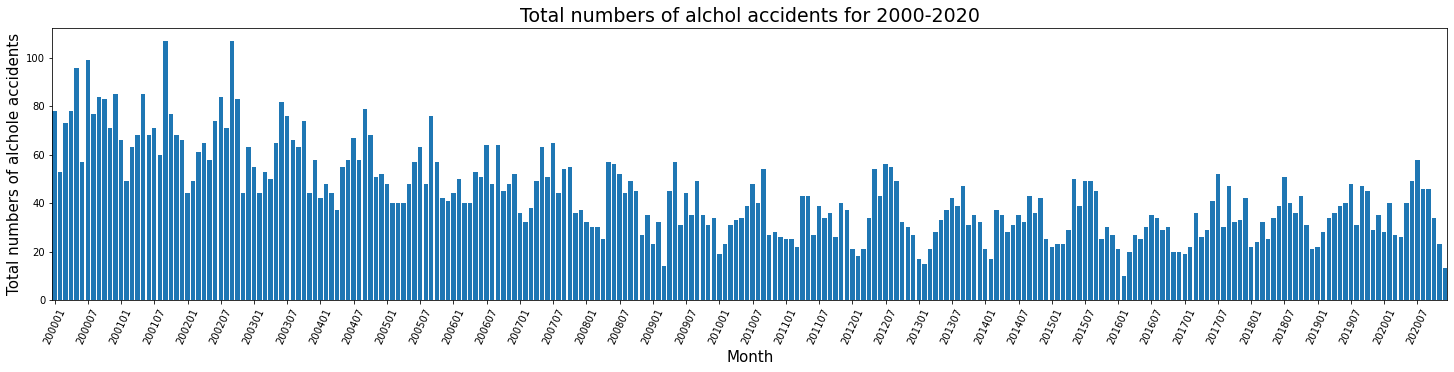

In [23]:
fig, ax = plt.subplots(figsize=(25,5)) 
ax.bar(df_m_alcohole_insgesamt.index,df_m_alcohole_insgesamt['WERT'])
ax.set_xticks(ax.get_xticks()[::6])
ax.margins(x=0)
plt.title('Total numbers of alchol accidents for 2000-2020', fontsize = 19)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total numbers of alchole accidents', fontsize = 15)
plt.xticks(rotation=65)
#plt.legend(loc = 2, prop = {'size': 12})
plt.show()

As we can observe, the alchole accident varies monly and yearly. But it still can conclude that the general alchole accident rate have been decreasing since 2007.
// we can change the color of each year.

# Prediction 

In [24]:
df_m_alcohole_insgesamt.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT
MONAT,,,,
200001,Alkoholunfälle,insgesamt,2000,78.0
200002,Alkoholunfälle,insgesamt,2000,53.0
200003,Alkoholunfälle,insgesamt,2000,73.0
200004,Alkoholunfälle,insgesamt,2000,78.0
200005,Alkoholunfälle,insgesamt,2000,96.0


In [25]:
df_m_alcohole_insgesamt.index

Index(['200001', '200002', '200003', '200004', '200005', '200006', '200007',
       '200008', '200009', '200010',
       ...
       '202003', '202004', '202005', '202006', '202007', '202008', '202009',
       '202010', '202011', '202012'],
      dtype='object', name='MONAT', length=252)

In [26]:
x = df_m_alcohole_insgesamt.index
x = x.to_numpy()

In [28]:
y = df_m_alcohole_insgesamt['WERT'].values

In [29]:
type(x)

numpy.ndarray

In [63]:
type(y)

numpy.ndarray

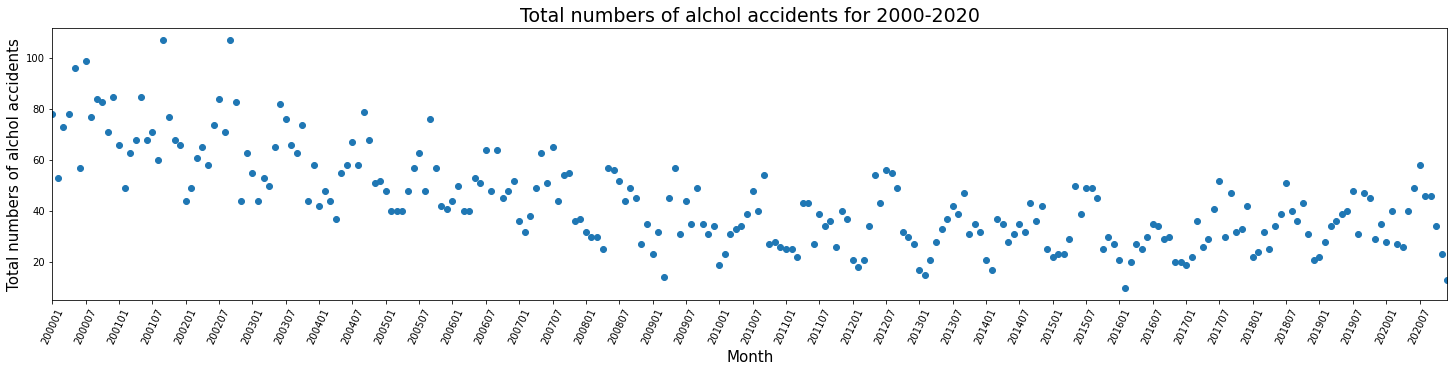

In [30]:
fig, ax = plt.subplots(figsize=(25,5))
plt.scatter(x,y)
ax.set_xticks(ax.get_xticks()[::6])
ax.margins(x=0)
plt.title('Total numbers of alchol accidents for 2000-2020', fontsize = 19)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total numbers of alchol accidents', fontsize = 15)
plt.xticks(rotation=65)
#plt.legend(loc = 2, prop = {'size': 12})
plt.show()

# Split the data into the training and test data:

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 1)
(51, 1)
(201, 1)
(51, 1)


# Train and test the model:

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [35]:
def create_polynomial_regression_model(degree, x_target_predict):
    poly_features= PolynomialFeatures(degree = degree)
    # transforms the existing features to higher degree features
    x_train_poly = poly_features.fit_transform(x_train)
    # fit the transformed features to Linear Regression
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    # predicting on training data-set
    y_train_predicted = model.predict(x_train_poly)
    # predicting on test data-set
    y_test_predict = model.predict(poly_features.fit_transform(x_test))
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    #predict target y value based on the model 
    # transforms the existing features to higher degree features
    #x_target_predict = poly_features.fit_transform(x_target_predict)
    y_target_predict = model.predict(poly_features.fit_transform(x_target_predict))
    print ("The total number of ".format(y_target_predict))   
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [36]:
x_test_  = np.array([['202101']])
create_polynomial_regression_model(2, x_test_)

The total number of 
The model performance for the training set
-------------------------------------------
RMSE of training set is 11.294636113132844
R2 score of training set is 0.6100429968318982


The model performance for the test set
-------------------------------------------
RMSE of test set is 10.698057317167066
R2 score of test set is 0.6395353400119395


/Users/wuriga/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


Conclution : From the plot above, we use Polynomial Regression to do the prefiction. The result shows that the total number of alchol accidents happened in january,2021 is 40.63256926 with a R value of 0.61.  